# Dataset

In [1]:
!wget https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/re8.csv

--2023-01-10 20:45:36--  https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/re8.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4649304 (4.4M) [text/plain]
Saving to: ‘re8.csv’

re8.csv             100%[===================>]   4.43M  --.-KB/s    in 0.07s   

2023-01-10 20:45:37 (63.4 MB/s) - ‘re8.csv’ saved [4649304/4649304]



In [2]:
!pip install git+https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git@feature-information
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git (to revision feature-information) to /tmp/pip-req-build-_gdki7oc
  Running command git clone --filter=blob:none --quiet https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git /tmp/pip-req-build-_gdki7oc
  Running command git checkout -b feature-information --track origin/feature-information
  Switched to a new branch 'feature-information'
  Branch 'feature-information' set up to track remote branch 'feature-information' from 'origin'.
  Resolved https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git to commit 2bc0f516e4bfbca683eb0102dff23c42fa8d398b
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/AlvaroJoseLopes/graph-walker to /tmp/pip-install-jjb0_tca/graph-walker_d95a2853104f4025bcbefa8e7899eca2
  Running command git clone --filter=blob:none --quiet https://github.com/AlvaroJoseL

In [3]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

def evaluate(df_embed, labels):
    # avaliando com clustering
    # kmeans = KMeans(n_clusters=len(np.unique(labels)), random_state=0).fit(df_emb_train)
    # kmeans.labels_
    # print('---> DeepWalk Transformers (clustering): ', normalized_mutual_info_score(kmeans.labels_, labels))

    # avaliando com classificacao
    print("\n\n\n---> DeepWalk Transformers (classification)")
    clf_train, clf_test, clf_train_y, clf_test_y  = train_test_split(df_embed, labels, test_size=0.3, random_state=42)
    clf = LinearSVC()
    clf.fit(clf_train, clf_train_y)
    print(classification_report(clf_test_y, clf.predict(clf_test)))

In [4]:
import pandas as pd 

df = pd.read_csv('re8.csv')
df

file_name                                               text  class
0       acq.4342.txt  mcdowell me to merger with interpharm inc mcdo...    acq
1       acq.5302.txt  intermagnetics general inma completes buy inte...    acq
2       acq.8530.txt  tesco extends hillards offer tesco plc tsco l ...    acq
3       acq.3841.txt  healthvest hvt sells shares healthvest a maryl...    acq
4       acq.6302.txt  cooper canada said it received takeover offers...    acq
...              ...                                                ...    ...
7669  trade.1829.txt  japan will not retaliate now against u s tarif...  trade
7670  trade.4403.txt  koreans to buy billion dlrs in u s goods south...  trade
7671  trade.6944.txt  belgolux trade swings into january deficit the...  trade
7672  trade.7420.txt  nakasone to visit washington in late april pri...  trade
7673  trade.5204.txt  baldrige warns of world trade war danger u s c...  trade

[7674 rows x 3 columns]

In [5]:
df['label'] = df['class'].astype('category').cat.codes
df

file_name                                               text  \
0       acq.4342.txt  mcdowell me to merger with interpharm inc mcdo...   
1       acq.5302.txt  intermagnetics general inma completes buy inte...   
2       acq.8530.txt  tesco extends hillards offer tesco plc tsco l ...   
3       acq.3841.txt  healthvest hvt sells shares healthvest a maryl...   
4       acq.6302.txt  cooper canada said it received takeover offers...   
...              ...                                                ...   
7669  trade.1829.txt  japan will not retaliate now against u s tarif...   
7670  trade.4403.txt  koreans to buy billion dlrs in u s goods south...   
7671  trade.6944.txt  belgolux trade swings into january deficit the...   
7672  trade.7420.txt  nakasone to visit washington in late april pri...   
7673  trade.5204.txt  baldrige warns of world trade war danger u s c...   

      class  label  
0       acq      0  
1       acq      0  
2       acq      0  
3       acq      0  
4       acq      0  
...     ...    ...  
7669  trade      7  
7670  trade      7  
7671  trade      7  
7672  trade      7  
7673  trade      7  

[7674 rows x 4 columns]

In [6]:
df = df.sample(frac=0.3).reset_index(drop=True)
df

file_name                                               text  \
0          acq.7677.txt  santa fe sfx aware of henley heng stake santa ...   
1          acq.1583.txt  revlon group agrees to merge with macandrews a...   
2         earn.7044.txt  raytheon co rtn sets quarterly qtly div cts vs...   
3     money_fx.3175.txt  bonn ministry has no comment on baker remarks ...   
4          acq.6343.txt  american motors said directors took no action ...   
...                 ...                                                ...   
2297       acq.5591.txt  court enjoins zico investment s tender for ban...   
2298     crude.4392.txt  shell canada said it raised crude prices by ca...   
2299       acq.8418.txt  california firm has five pct of modulaire modx...   
2300      earn.7319.txt  american brands sees record first quarter results   
2301       acq.1491.txt  sosnoff raises bid for caesars world caw inves...   

      class  label  
0       acq      0  
1       acq      0  
2      earn      2  
3     money      5  
4       acq      0  
...     ...    ...  
2297    acq      0  
2298  crude      1  
2299    acq      0  
2300   earn      2  
2301    acq      0  

[2302 rows x 4 columns]

In [7]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 101.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=10066ef8651cbedefa3f6e8d8aaa38f0cec0c9a9736c2fe5e348e9147cd38ec5
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [8]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


embeddings = model.encode(df.text.to_list())


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [9]:
df['embeddings'] = list(embeddings)
df

file_name                                               text  \
0          acq.7677.txt  santa fe sfx aware of henley heng stake santa ...   
1          acq.1583.txt  revlon group agrees to merge with macandrews a...   
2         earn.7044.txt  raytheon co rtn sets quarterly qtly div cts vs...   
3     money_fx.3175.txt  bonn ministry has no comment on baker remarks ...   
4          acq.6343.txt  american motors said directors took no action ...   
...                 ...                                                ...   
2297       acq.5591.txt  court enjoins zico investment s tender for ban...   
2298     crude.4392.txt  shell canada said it raised crude prices by ca...   
2299       acq.8418.txt  california firm has five pct of modulaire modx...   
2300      earn.7319.txt  american brands sees record first quarter results   
2301       acq.1491.txt  sosnoff raises bid for caesars world caw inves...   

      class  label                                         embeddings  
0       acq      0  [0.1019378, -0.32522437, 0.09540112, -0.040091...  
1       acq      0  [-0.34024256, -0.5121553, 0.12414422, 0.141213...  
2      earn      2  [-0.55606854, -0.18854992, 0.36036557, -0.1041...  
3     money      5  [0.114837416, -0.06248491, -0.4545452, 0.07294...  
4       acq      0  [0.31259826, -0.4025402, 0.023579976, 0.162556...  
...     ...    ...                                                ...  
2297    acq      0  [-0.48561478, 0.46171683, -0.13576032, -0.5871...  
2298  crude      1  [-0.3007939, -0.20155072, -0.6111615, 0.734604...  
2299    acq      0  [0.3185707, -0.6038677, -0.058842033, -0.25709...  
2300   earn      2  [-0.0997598, -0.75634944, -0.41217467, 0.04454...  
2301    acq      0  [-0.2707878, 0.1793912, -0.28221887, -0.029978...  

[2302 rows x 5 columns]

# Building a example graph

In [10]:
from sklearn.neighbors import kneighbors_graph
import numpy as np
A = kneighbors_graph(np.array(df['embeddings'].to_list()), n_neighbors=5, metric="cosine")

In [11]:
import networkx as nx 
G = nx.Graph(A)

In [12]:
G.number_of_nodes()

2302

# Edge Sampling

In [13]:
max_size = G.number_of_nodes() // 1.25
max_size

1841.0

In [14]:
import random
# Tentando otimizar
class TIES():
    def __init__(self, seed=42):
        random.seed(seed)
        self.G_sample = nx.Graph()

    def sample(self, G, max_size = 30000):
        # Shuffling edges and keeping track of index of edge to be sampled
        edges = list(G.edges())
        random.shuffle(edges)
        idx_edges = 0

        # Step 1: Edge based node sampling        
        while self.G_sample.number_of_nodes() < max_size:
            u,v = edges[idx_edges]
            self.G_sample.add_edge(u,v)
            idx_edges += 1

        # Step 2: Graph induction
        nodes_sample = set(self.G_sample.nodes())
        for v in self.G_sample.nodes():
            neighbors = G.neighbors(v)
            valid_neighbors = nodes_sample.intersection(neighbors)

            for neigh in valid_neighbors:
                self.G_sample.add_edge(v, neigh)

        return self.G_sample

In [15]:
%%time
ties = TIES()
sampled = ties.sample(G, max_size=max_size)
sampled.number_of_nodes(), sampled.number_of_edges()

CPU times: user 85 ms, sys: 2.83 ms, total: 87.9 ms
Wall time: 89 ms


(1841, 6625)

In [16]:
sampled = nx.convert_node_labels_to_integers(sampled, label_attribute='old')
old_mapping = nx.get_node_attributes(sampled, 'old')

# Using the API

In [17]:
num_walks = 50
walk_len = 10
embed_dim = 32
mask_rate = 0.5
batch_size = 128
epochs = 4
lr = 0.0001

## Without Feature Information

### Transductively getting the embeddings

In [18]:
from deep_walk_transformers.deep_walk_transformers import DeepWalkTransformers
dwt = DeepWalkTransformers(
    num_walks,
    walk_len,
    mask_rate,
    embed_dim
)
dwt.fit(sampled, batch_size=batch_size, epochs=epochs, lr=lr)

Random walks - T=0.05s
Walks shape: (92050, 10)


/usr/local/lib/python3.8/dist-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Building X_paths and X_positions:   0%|          | 0/92050 [00:00<?, ?it/s]

Getting Vectorize Layer ...
Encoding texts ...
Getting masked input (mask token id = 1843) ...
Building Masked Language Bert Model ...
([<KerasTensor: shape=(None, 10) dtype=int64 (created by layer 'input_1')>, <KerasTensor: shape=(None, 10) dtype=int64 (created by layer 'input_2')>], <KerasTensor: shape=(None, 10, 1841) dtype=float32 (created by layer 'mlm_cls')>)
{'has_feature': False, 'name': 'masked_bert_model'}
Fake Training MLM model ... 
Epoch 1/4
eh pra entrar aqui!!!
eh pra entrar aqui!!!
720/720 [==============================] - 8s 8ms/step - loss: 7.5073
Epoch 2/4
720/720 [==============================] - 6s 8ms/step - loss: 7.4692
Epoch 3/4
720/720 [==============================] - 6s 8ms/step - loss: 7.4424
Epoch 4/4
720/720 [==============================] - 5s 8ms/step - loss: 7.4239


In [19]:
from tqdm import tqdm

transductive_node_embeddings = dwt.get_transductive_embeddings()
embeddings_sampled = {}
for node, embedding in tqdm(transductive_node_embeddings.items()):
    embeddings_sampled[old_mapping[node]] = embedding 

df_embed_transductive = pd.DataFrame.from_dict(embeddings_sampled, orient='index')

2877/2877 [==============================] - 8s 3ms/step


100%|██████████| 1841/1841 [00:00<00:00, 379296.28it/s]


In [20]:
df_embed_transductive.head()

0         1         2         3         4         5         6   \
1871 -0.728026 -0.437575  0.751778 -0.422179  0.887057  0.082687  0.197336   
2009 -0.724762 -0.676394  0.829900 -0.585728  0.938367  0.157606  0.200132   
137  -0.721338 -0.867533  0.902684 -0.834595  0.987043  0.038604  0.237761   
1767 -0.708944 -0.865692  0.852446 -0.975378  1.082903  0.045064  0.349908   
47   -0.568046 -0.993191  0.962346 -0.635584  0.936074  0.097795  0.131677   

            7         8         9   ...        22        23        24  \
1871  0.514552  0.862604  0.773600  ... -0.917646  0.856828 -0.908819   
2009  0.444662  0.841862  0.893675  ... -0.945845  0.819360 -0.935066   
137   0.298206  0.826073  0.883020  ... -0.824530  0.872095 -0.980152   
1767  0.334400  0.855022  0.737313  ... -0.821157  0.820037 -0.938505   
47    0.440622  0.782236  0.860355  ... -0.869791  0.914810 -1.013208   

            25        26        27        28        29        30        31  
1871  1.112461 -0.876458  1.124181 -1.197052  1.204378 -1.450433  1.088912  
2009  1.085477 -0.875109  1.193122 -1.199248  1.226862 -1.414661  1.060826  
137   1.259509 -0.779961  1.128455 -1.153399  1.121503 -1.383180  0.958736  
1767  1.097980 -0.657035  1.180178 -1.016103  1.163787 -1.419333  0.971412  
47    1.249100 -0.838094  1.171301 -1.196627  1.265439 -1.295396  1.100708  

[5 rows x 32 columns]

In [21]:
df_embed_transductive.shape

(1841, 32)

In [22]:
np.sum(list(old_mapping.values()) == df_embed_transductive.index)

1841

In [23]:
labels = df.iloc[df_embed_transductive.index].label.to_list()

In [24]:
evaluate(df_embed_transductive, labels)




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.55      0.52      0.53       179
           1       0.33      0.04      0.07        24
           2       0.63      0.85      0.72       274
           3       0.00      0.00      0.00         2
           4       0.50      0.12      0.19        17
           5       0.30      0.17      0.21        18
           6       0.00      0.00      0.00        13
           7       1.00      0.04      0.07        26

    accuracy                           0.60       553
   macro avg       0.41      0.22      0.23       553
weighted avg       0.58      0.60      0.55       553



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

In [25]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed_transductive)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = labels
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")

### Inductively getting the embeddings

In [26]:
nodes_of_sampled = set(list(old_mapping.values()))
nodes_of_fullGraph = set(G.nodes())
starting_nodes = list(nodes_of_fullGraph.difference(nodes_of_sampled))

In [27]:
nodes_of_fullGraph == nodes_of_sampled | nodes_of_fullGraph.difference(nodes_of_sampled)

True

In [28]:
inductive_node_embeddings = dwt.get_inductive_embeddings(G, starting_nodes)
df_embed_inductive = pd.DataFrame.from_dict(inductive_node_embeddings, orient='index')

Random walks - T=0.05s
Walks shape: (23050, 10)


/usr/local/lib/python3.8/dist-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Building X_paths and X_positions:   0%|          | 0/23050 [00:00<?, ?it/s]

Getting Vectorize Layer ...
Encoding texts ...
721/721 [==============================] - 3s 4ms/step


In [29]:
df_embed_inductive.head()

0         1         2         3         4         5         6   \
2049 -0.714336 -1.043436  1.017211 -0.986016  1.093390  0.007760  0.248523   
2    -0.568994 -0.827649  0.803973 -0.351966  0.923860  0.212036  0.075645   
2059 -0.529057 -0.892130  0.826812 -0.484006  0.835605  0.210856  0.114477   
12   -0.801672 -0.984344  1.026872 -1.121153  1.097998 -0.133200  0.325004   
2061 -0.701199 -0.963164  0.920253 -0.869193  1.021271 -0.002801  0.275289   

            7         8         9   ...        22        23        24  \
2049  0.273559  0.788172  0.734567  ... -0.864693  0.907655 -0.923537   
2     0.489442  0.855098  0.777664  ... -0.928859  0.964069 -0.920142   
2059  0.531903  0.757440  0.887856  ... -0.893535  1.001019 -1.023372   
12    0.311735  0.886705  0.848967  ... -0.903560  0.798346 -0.964930   
2061  0.336911  0.807716  0.857156  ... -0.885712  0.968863 -0.995883   

            25        26        27        28        29        30        31  
2049  1.116107 -0.583830  1.248893 -1.045649  1.182803 -1.360735  0.892043  
2     1.288125 -0.947566  1.054700 -1.296162  1.201318 -1.391095  1.167879  
2059  1.192267 -0.923467  1.119327 -1.223979  1.228518 -1.358072  1.228149  
12    1.054124 -0.564804  1.318597 -0.993738  1.156540 -1.271520  0.908009  
2061  1.129025 -0.765759  1.254813 -1.092646  1.205368 -1.359472  0.972210  

[5 rows x 32 columns]

In [30]:
np.sum(df_embed_inductive.index == starting_nodes)

461

In [31]:
df_embed_inductive.shape

(461, 32)

In [32]:
labels = df.iloc[df_embed_inductive.index].label.to_list()
evaluate(df_embed_inductive, labels)




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.51      0.45      0.48        44
           1       1.00      0.20      0.33         5
           2       0.67      0.85      0.75        73
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         6

    accuracy                           0.60       139
   macro avg       0.31      0.21      0.22       139
weighted avg       0.55      0.60      0.56       139



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

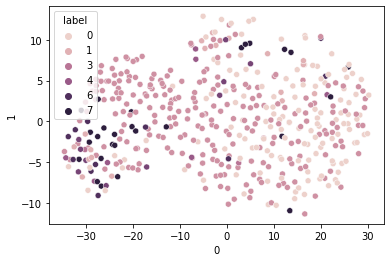

In [33]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed_inductive)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = labels
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")

### Evaluating both

In [34]:
df_embed = pd.concat([df_embed_transductive, df_embed_inductive])
df_embed.shape

(2302, 32)

In [35]:
df_embed.head()

0         1         2         3         4         5         6   \
1871 -0.728026 -0.437575  0.751778 -0.422179  0.887057  0.082687  0.197336   
2009 -0.724762 -0.676394  0.829900 -0.585728  0.938367  0.157606  0.200132   
137  -0.721338 -0.867533  0.902684 -0.834595  0.987043  0.038604  0.237761   
1767 -0.708944 -0.865692  0.852446 -0.975378  1.082903  0.045064  0.349908   
47   -0.568046 -0.993191  0.962346 -0.635584  0.936074  0.097795  0.131677   

            7         8         9   ...        22        23        24  \
1871  0.514552  0.862604  0.773600  ... -0.917646  0.856828 -0.908819   
2009  0.444662  0.841862  0.893675  ... -0.945845  0.819360 -0.935066   
137   0.298206  0.826073  0.883020  ... -0.824530  0.872095 -0.980152   
1767  0.334400  0.855022  0.737313  ... -0.821157  0.820037 -0.938505   
47    0.440622  0.782236  0.860355  ... -0.869791  0.914810 -1.013208   

            25        26        27        28        29        30        31  
1871  1.112461 -0.876458  1.124181 -1.197052  1.204378 -1.450433  1.088912  
2009  1.085477 -0.875109  1.193122 -1.199248  1.226862 -1.414661  1.060826  
137   1.259509 -0.779961  1.128455 -1.153399  1.121503 -1.383180  0.958736  
1767  1.097980 -0.657035  1.180178 -1.016103  1.163787 -1.419333  0.971412  
47    1.249100 -0.838094  1.171301 -1.196627  1.265439 -1.295396  1.100708  

[5 rows x 32 columns]

In [36]:
set(df_embed.index) == nodes_of_fullGraph

True

In [37]:
labels = df.iloc[df_embed.index].label.to_list()
evaluate(df_embed, labels)




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.55      0.47      0.51       230
           1       0.38      0.09      0.14        35
           2       0.61      0.85      0.71       337
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        20
           5       0.50      0.09      0.15        23
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00        26

    accuracy                           0.58       691
   macro avg       0.25      0.19      0.19       691
weighted avg       0.52      0.58      0.53       691



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

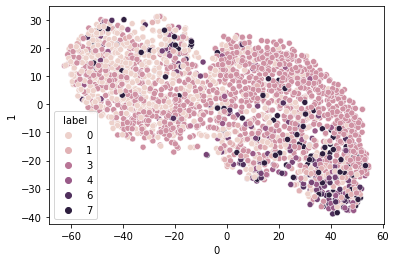

In [38]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = labels
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")

## With Feature Information

In [39]:
features_sampled_nodes = []
for node in sampled.nodes():
    features_sampled_nodes.append(embeddings[node])
features_sampled_nodes = np.array(features_sampled_nodes)

features_sampled_nodes.shape

(1841, 384)

### Transductively getting the embeddings

In [40]:
from deep_walk_transformers.deep_walk_transformers import DeepWalkTransformers
dwt = DeepWalkTransformers(
    num_walks,
    walk_len,
    mask_rate,
    embed_dim
)
dwt.fit(
    sampled, features=features_sampled_nodes, batch_size=batch_size,
    epochs=epochs, lr=lr
)

Random walks - T=0.05s
Walks shape: (92050, 10)


/usr/local/lib/python3.8/dist-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Building X_paths and X_positions:   0%|          | 0/92050 [00:00<?, ?it/s]

Getting Vectorize Layer ...
Encoding texts ...
Getting masked input (mask token id = 1843) ...
Building Masked Language Bert Model ...
([<KerasTensor: shape=(None, 10) dtype=int64 (created by layer 'input_7')>, <KerasTensor: shape=(None, 10) dtype=int64 (created by layer 'input_8')>, <KerasTensor: shape=(None, 384) dtype=int64 (created by layer 'input_9')>], <KerasTensor: shape=(None, 10, 1841) dtype=float32 (created by layer 'mlm_cls')>)
{'has_feature': True, 'name': 'masked_bert_model'}
Fake Training MLM model ... 
Epoch 1/4
eh pra entrar aqui!!!
eh pra entrar aqui!!!
720/720 [==============================] - 9s 10ms/step - loss: 7.5083
Epoch 2/4
720/720 [==============================] - 6s 9ms/step - loss: 7.4692
Epoch 3/4
720/720 [==============================] - 5s 8ms/step - loss: 7.4420
Epoch 4/4
720/720 [==============================] - 5s 8ms/step - loss: 7.4235


In [41]:
from tqdm import tqdm

transductive_node_embeddings = dwt.get_transductive_embeddings()
embeddings_sampled = {}
for node, embedding in tqdm(transductive_node_embeddings.items()):
    embeddings_sampled[old_mapping[node]] = embedding 

df_embed_transductive = pd.DataFrame.from_dict(embeddings_sampled, orient='index')

2877/2877 [==============================] - 8s 3ms/step


100%|██████████| 1841/1841 [00:00<00:00, 218035.12it/s]


In [42]:
df_embed_transductive.head()

0         1         2         3         4         5         6   \
1871  0.201409 -0.208474  0.730014 -1.144818  0.776107  1.033758  1.093643   
2009  0.140081 -0.331407  0.761661 -1.236865  0.917069  0.963904  1.107644   
137  -0.089683 -0.465291  0.802174 -1.269883  0.923575  0.997306  1.062861   
1767  0.101418 -0.414487  0.755956 -1.202263  0.920401  0.952743  1.150751   
47    0.144854 -0.732889  0.838263 -1.331159  1.001488  1.017320  1.136510   

            7         8         9   ...        22        23        24  \
1871  1.135859 -0.484813  0.746180  ... -1.119113  0.850929 -1.228354   
2009  1.073488 -0.465653  0.833358  ... -1.132798  0.820597 -1.084455   
137   1.115730 -0.395004  0.867188  ... -1.079435  0.660377 -1.102964   
1767  1.128238 -0.368899  0.699604  ... -1.276502  0.806947 -1.136002   
47    1.198104 -0.473530  0.962038  ... -1.325470  0.769667 -1.092249   

            25        26        27        28        29        30        31  
1871 -0.542442 -0.988294  0.780894 -1.057066  0.801365 -1.026700  1.090192  
2009 -0.475811 -0.900679  0.884042 -1.068666  0.697750 -1.021698  1.096339  
137  -0.596828 -0.987019  0.768606 -0.941098  0.773147 -0.771370  1.007610  
1767 -0.620902 -0.964718  0.824608 -0.970208  0.834838 -0.891197  0.960766  
47   -0.518292 -0.974862  0.849572 -0.993314  0.861992 -0.870534  1.083987  

[5 rows x 32 columns]

In [43]:
df_embed_transductive.shape

(1841, 32)

In [44]:
np.sum(list(old_mapping.values()) == df_embed_transductive.index)

1841

In [45]:
labels = df.iloc[df_embed_transductive.index].label.to_list()
evaluate(df_embed_transductive, labels)




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.48      0.43      0.46       179
           1       0.75      0.12      0.21        24
           2       0.60      0.84      0.70       274
           3       0.00      0.00      0.00         2
           4       0.50      0.12      0.19        17
           5       0.00      0.00      0.00        18
           6       0.75      0.23      0.35        13
           7       0.00      0.00      0.00        26

    accuracy                           0.57       553
   macro avg       0.39      0.22      0.24       553
weighted avg       0.52      0.57      0.52       553



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

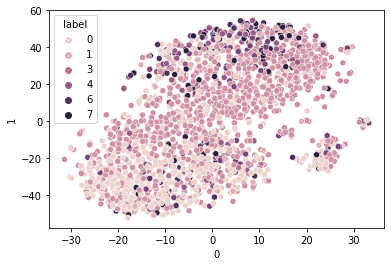

In [46]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed_transductive)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = labels
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")

### Inductively getting the embeddings

In [47]:
features_starting_nodes = {}
for node in starting_nodes:
    features_starting_nodes[node] = embeddings[node]
len(features_starting_nodes)

461

In [48]:
inductive_node_embeddings = dwt.get_inductive_embeddings(G, starting_nodes, features=features_starting_nodes)
df_embed_inductive = pd.DataFrame.from_dict(inductive_node_embeddings, orient='index')

Random walks - T=0.04s
Walks shape: (23050, 10)


/usr/local/lib/python3.8/dist-packages/walker/preprocessing.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).astype(np.float32)


Building X_paths and X_positions:   0%|          | 0/23050 [00:00<?, ?it/s]

Getting Vectorize Layer ...
Encoding texts ...
721/721 [==============================] - 2s 3ms/step


In [49]:
df_embed_inductive.head()

0         1         2         3         4         5         6   \
2049 -0.344204 -0.610468  0.902852 -1.458554  1.017750  0.871586  1.187058   
2     0.377466 -0.367133  0.654015 -1.141196  0.843993  1.052201  1.048691   
2059  0.472672 -0.499937  0.660011 -1.157390  0.904339  1.010244  1.036466   
12   -0.305855 -0.455085  0.851996 -1.532367  0.982249  0.862807  1.163410   
2061 -0.177644 -0.551896  0.792966 -1.331077  0.976099  0.978816  1.032084   

            7         8         9   ...        22        23        24  \
2049  1.199517 -0.311805  0.881550  ... -1.134346  0.633009 -1.066437   
2     1.001291 -0.562139  0.861241  ... -1.132268  0.838800 -1.140699   
2059  1.065583 -0.614572  0.836471  ... -1.243166  0.900698 -1.174983   
12    1.203664 -0.196099  0.780617  ... -1.151543  0.706116 -1.071167   
2061  1.107220 -0.497299  0.985879  ... -1.135072  0.650580 -0.946932   

            25        26        27        28        29        30        31  
2049 -0.513782 -0.969591  0.935022 -0.979001  0.829896 -0.837648  1.040620  
2    -0.651688 -1.051757  0.741203 -0.967417  0.780273 -0.885596  1.006918  
2059 -0.531759 -1.050363  0.715701 -0.948260  0.846514 -0.999813  1.118229  
12   -0.483563 -0.829162  0.846510 -0.932215  0.722992 -0.762502  1.095293  
2061 -0.561113 -0.971406  0.904475 -1.018617  0.719045 -0.782792  1.077349  

[5 rows x 32 columns]

In [50]:
df_embed_inductive.shape

(461, 32)

In [51]:
labels = df.iloc[df_embed_inductive.index].label.to_list()
evaluate(df_embed_inductive, labels)




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.52      0.57      0.54        44
           1       0.00      0.00      0.00         5
           2       0.67      0.82      0.74        73
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         6

    accuracy                           0.61       139
   macro avg       0.20      0.23      0.21       139
weighted avg       0.51      0.61      0.56       139



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

In [52]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed_inductive)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = labels
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")

### Evaluating both

In [53]:
df_embed = pd.concat([df_embed_transductive, df_embed_inductive])
df_embed.shape

(2302, 32)

In [54]:
df_embed.head()

0         1         2         3         4         5         6   \
1871  0.201409 -0.208474  0.730014 -1.144818  0.776107  1.033758  1.093643   
2009  0.140081 -0.331407  0.761661 -1.236865  0.917069  0.963904  1.107644   
137  -0.089683 -0.465291  0.802174 -1.269883  0.923575  0.997306  1.062861   
1767  0.101418 -0.414487  0.755956 -1.202263  0.920401  0.952743  1.150751   
47    0.144854 -0.732889  0.838263 -1.331159  1.001488  1.017320  1.136510   

            7         8         9   ...        22        23        24  \
1871  1.135859 -0.484813  0.746180  ... -1.119113  0.850929 -1.228354   
2009  1.073488 -0.465653  0.833358  ... -1.132798  0.820597 -1.084455   
137   1.115730 -0.395004  0.867188  ... -1.079435  0.660377 -1.102964   
1767  1.128238 -0.368899  0.699604  ... -1.276502  0.806947 -1.136002   
47    1.198104 -0.473530  0.962038  ... -1.325470  0.769667 -1.092249   

            25        26        27        28        29        30        31  
1871 -0.542442 -0.988294  0.780894 -1.057066  0.801365 -1.026700  1.090192  
2009 -0.475811 -0.900679  0.884042 -1.068666  0.697750 -1.021698  1.096339  
137  -0.596828 -0.987019  0.768606 -0.941098  0.773147 -0.771370  1.007610  
1767 -0.620902 -0.964718  0.824608 -0.970208  0.834838 -0.891197  0.960766  
47   -0.518292 -0.974862  0.849572 -0.993314  0.861992 -0.870534  1.083987  

[5 rows x 32 columns]

In [55]:
set(df_embed.index) == nodes_of_fullGraph

True

In [56]:
labels = df.iloc[df_embed.index].label.to_list()
evaluate(df_embed, labels)




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.47      0.39      0.43       230
           1       0.50      0.03      0.05        35
           2       0.57      0.82      0.67       337
           3       0.00      0.00      0.00         3
           4       0.25      0.05      0.08        20
           5       0.00      0.00      0.00        23
           6       1.00      0.12      0.21        17
           7       0.00      0.00      0.00        26

    accuracy                           0.54       691
   macro avg       0.35      0.18      0.18       691
weighted avg       0.49      0.54      0.48       691



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

In [57]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = labels
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")

In [58]:
type(features_sampled_nodes)

numpy.ndarray

In [59]:
features_starting_nodes

{2049: array([-0.3069152 , -0.2262157 , -0.02700054, -0.24465096, -0.18689132,
        -0.00603889,  0.24524145,  0.04680469,  0.13161214,  0.4817129 ,
        -0.03250238,  0.05111639, -0.22412343,  0.07144174,  0.07256831,
        -0.30095863, -0.5803334 ,  0.00343165,  0.04508152, -0.0863042 ,
        -0.5293079 ,  0.01138888, -0.12465725,  0.19353835,  0.07860291,
         0.29503354, -0.15021783,  0.09351591,  0.5127589 ,  0.06153841,
         0.08068934,  0.15516032,  0.3664659 , -0.00780269, -0.3419912 ,
         0.26665464, -0.09257988, -0.19126223, -0.3055843 , -0.1976542 ,
         0.21861887,  0.28678873, -0.0840858 ,  0.01954563, -0.04306021,
         0.27680135, -0.3009176 ,  0.17798555,  0.19863708,  0.39198276,
         0.55892473, -0.46701932, -0.06179852, -0.06119015, -0.03699427,
         0.5691004 , -0.34650266, -0.28130916,  0.3407739 ,  0.12630445,
        -0.22995669, -0.12798403,  0.15971331, -0.01741897,  0.63719344,
        -0.7716648 , -0.07863858,  0.3843489 